In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [33]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
train.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [34]:
test.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,2021-05-06 15:02:00,15.507537,19.956882,40.233264,410.538834,57.357366,84.008399,48.826597,45.363477,2.419202,1.468876,156.399396,2.438629,0.790435,Turbine_14
1,2021-12-04 06:11:00,472.577255,478.373881,12.306687,965.077563,51.796727,492.531362,27.457511,24.045565,96.152070,119.378235,56.443802,5.900371,0.544198,Turbine_19
2,2021-08-31 19:03:00,447.829615,451.158264,29.106771,948.035899,60.493098,393.151576,39.410553,35.715697,90.251529,117.192635,224.540263,5.924923,0.513481,Turbine_14
3,2021-09-19 19:01:00,254.014336,249.438965,27.074900,804.963776,55.741899,178.715101,29.476841,31.151895,89.273838,105.086257,182.151426,4.409707,0.448881,Turbine_120
4,2021-04-04 02:21:00,1174.930566,1202.654077,32.148434,1199.754858,67.272313,1115.850317,31.920549,30.864277,189.731989,236.053320,261.672180,7.822326,0.561465,Turbine_158


In [35]:
train.shape, test.shape

((909604, 16), (303202, 15))

In [36]:
train.timestamp[0]

'2021-02-19 20:18:00'

In [37]:
train.timestamp = pd.to_datetime(train.timestamp)
train.timestamp

0        2021-02-19 20:18:00
1        2021-04-27 04:55:00
2        2021-01-25 06:26:00
3        2021-10-30 03:47:00
4        2021-03-15 00:39:00
                 ...        
909599   2021-04-25 19:12:00
909600   2021-02-20 17:37:00
909601   2021-10-22 14:18:00
909602   2021-02-08 22:03:00
909603   2021-04-09 14:28:00
Name: timestamp, Length: 909604, dtype: datetime64[ns]

In [38]:
train.turbine_id.value_counts()

Turbine_15     58048
Turbine_18     57892
Turbine_120    57754
Turbine_97     57683
Turbine_158    57470
Turbine_108    57401
Turbine_105    57341
Turbine_103    56944
Turbine_14     56934
Turbine_139    56930
Turbine_13     56853
Turbine_20     56523
Turbine_19     56346
Turbine_123    56225
Turbine_10     55089
Turbine_01     54171
Name: turbine_id, dtype: int64

In [39]:
test.turbine_id.value_counts()

Turbine_15     19533
Turbine_97     19341
Turbine_158    19312
Turbine_18     19310
Turbine_105    19308
Turbine_120    19116
Turbine_108    19021
Turbine_103    18982
Turbine_14     18960
Turbine_20     18933
Turbine_139    18890
Turbine_13     18733
Turbine_19     18708
Turbine_123    18683
Turbine_10     18333
Turbine_01     18039
Name: turbine_id, dtype: int64

In [40]:
train.timestamp.sort_values()[:10]

45421    2021-01-01 00:01:00
658721   2021-01-01 00:02:00
545675   2021-01-01 00:03:00
772206   2021-01-01 00:04:00
171257   2021-01-01 00:07:00
33344    2021-01-01 00:08:00
375613   2021-01-01 00:09:00
790434   2021-01-01 00:09:00
349641   2021-01-01 00:11:00
466787   2021-01-01 00:11:00
Name: timestamp, dtype: datetime64[ns]

In [41]:
test.timestamp.sort_values()

245502    2021-01-01 00:06:00
12224     2021-01-01 00:08:00
102038    2021-01-01 00:15:00
198824    2021-01-01 00:18:00
104427    2021-01-01 00:18:00
                 ...         
206452    2021-12-31 23:50:00
77304     2021-12-31 23:51:00
123336    2021-12-31 23:53:00
240992    2021-12-31 23:54:00
46286     2021-12-31 23:56:00
Name: timestamp, Length: 303202, dtype: object

In [42]:
train.iloc[171257]

timestamp                                 2021-01-01 00:07:00
active_power_calculated_by_converter               533.733658
active_power_raw                                    546.28363
ambient_temperature                                 17.740356
generator_speed                                     914.03653
generator_winding_temp_max                          47.747667
grid_power10min_average                            630.811483
nc1_inside_temp                                     27.737041
nacelle_temp                                        25.652557
reactice_power_calculated_by_converter              98.943169
reactive_power                                      126.82702
wind_direction_raw                                  70.080187
wind_speed_raw                                       6.738743
wind_speed_turbulence                                0.734213
turbine_id                                        Turbine_103
Target                                              42.531269
Name: 17

In [43]:
train.iloc[33344]

timestamp                                 2021-01-01 00:08:00
active_power_calculated_by_converter               942.397034
active_power_raw                                   973.433543
ambient_temperature                                 25.447209
generator_speed                                   1199.754785
generator_winding_temp_max                          58.331247
grid_power10min_average                           1011.605296
nc1_inside_temp                                     26.734045
nacelle_temp                                        23.956085
reactice_power_calculated_by_converter             145.573168
reactive_power                                     191.055311
wind_direction_raw                                  49.007991
wind_speed_raw                                       7.712157
wind_speed_turbulence                                0.404912
turbine_id                                        Turbine_158
Target                                              41.221699
Name: 33

In [44]:
test.iloc[245502]

timestamp                                 2021-01-01 00:06:00
active_power_calculated_by_converter               975.188029
active_power_raw                                  1005.913961
ambient_temperature                                 25.460711
generator_speed                                   1200.243095
generator_winding_temp_max                          57.926095
grid_power10min_average                           1018.267802
nc1_inside_temp                                     26.737586
nacelle_temp                                        23.928331
reactice_power_calculated_by_converter             158.431951
reactive_power                                     196.259565
wind_direction_raw                                    50.2058
wind_speed_raw                                       7.899686
wind_speed_turbulence                                0.339865
turbine_id                                        Turbine_158
Name: 245502, dtype: object

<AxesSubplot:>

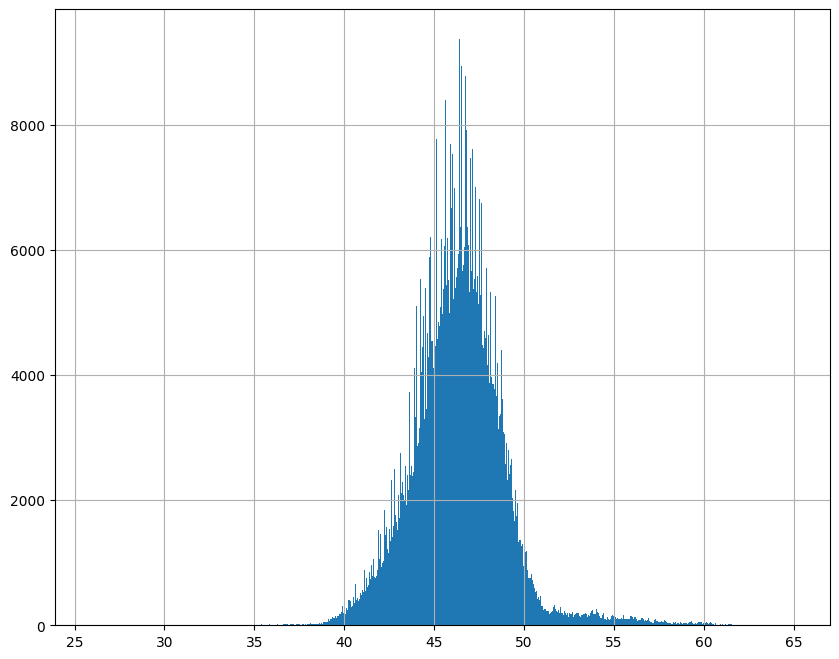

In [45]:
train.Target.hist(bins=1000)

In [46]:
train.columns

Index(['timestamp', 'active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id', 'Target'],
      dtype='object')

<AxesSubplot:>

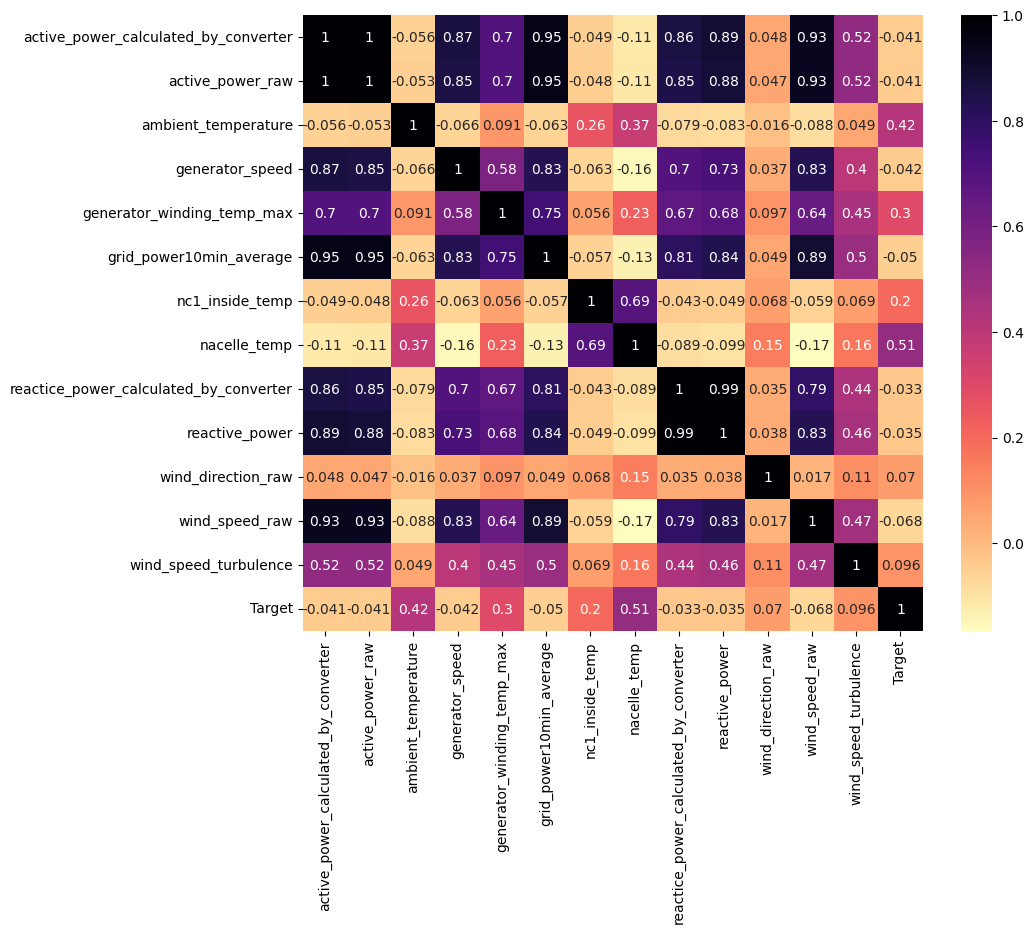

In [47]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.heatmap(train.corr(), annot=True, cmap='magma_r')

In [48]:
train.columns

Index(['timestamp', 'active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id', 'Target'],
      dtype='object')

In [49]:
train.dtypes

timestamp                                 datetime64[ns]
active_power_calculated_by_converter             float64
active_power_raw                                 float64
ambient_temperature                              float64
generator_speed                                  float64
generator_winding_temp_max                       float64
grid_power10min_average                          float64
nc1_inside_temp                                  float64
nacelle_temp                                     float64
reactice_power_calculated_by_converter           float64
reactive_power                                   float64
wind_direction_raw                               float64
wind_speed_raw                                   float64
wind_speed_turbulence                            float64
turbine_id                                        object
Target                                           float64
dtype: object

In [50]:
turbine_mean = train.groupby('turbine_id').agg('mean')['Target']
turbine_mean

turbine_id
Turbine_01     49.288458
Turbine_10     47.186210
Turbine_103    45.604759
Turbine_105    46.585878
Turbine_108    46.549006
Turbine_120    45.517760
Turbine_123    44.642011
Turbine_13     46.855068
Turbine_139    45.643603
Turbine_14     47.722849
Turbine_15     46.388378
Turbine_158    45.563365
Turbine_18     45.178387
Turbine_19     44.463866
Turbine_20     48.420630
Turbine_97     45.834314
Name: Target, dtype: float64

In [51]:
train.Target.mean()

46.32859479501452

In [52]:
train.Target.shape

(909604,)

In [53]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape(train.Target, np.full(train.Target.shape, 46.3215497)) # this is no percentage 

0.04104203148161148

In [54]:
def pred_tar(t_id):
    return turbine_mean[t_id]

train['t_m'] = train['turbine_id'].apply(pred_tar)
mape(train['Target'], train['t_m'])

0.036952391223202624

In [55]:
from sklearn.metrics import make_scorer
mape_scorer = make_scorer(mape)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
from category_encoders.target_encoder import TargetEncoder 
from sklearn.compose import make_column_transformer
from catboost import CatBoostRegressor

te = TargetEncoder()
lr = LinearRegression()
cb = CatBoostRegressor(verbose=1000, n_estimators=2000)
ct = make_column_transformer(
    (te, ['turbine_id'])
)

lr_pipe = make_pipeline(
    ct,
    cb
)

cv = cross_val_score(lr_pipe, train.drop(['timestamp', 't_m'], axis=1), train.Target, cv=5, scoring=mape_scorer)

Learning rate set to 0.066013
0:	learn: 2.5761332	total: 206ms	remaining: 6m 51s
1000:	learn: 2.2859695	total: 1m 23s	remaining: 1m 23s
1999:	learn: 2.2859695	total: 2m 54s	remaining: 0us
Learning rate set to 0.066013
0:	learn: 2.5782665	total: 87.2ms	remaining: 2m 54s
1000:	learn: 2.2885235	total: 1m 24s	remaining: 1m 24s
1999:	learn: 2.2885235	total: 2m 48s	remaining: 0us
Learning rate set to 0.066013
0:	learn: 2.5801817	total: 103ms	remaining: 3m 25s
1000:	learn: 2.2889397	total: 1m 10s	remaining: 1m 10s
1999:	learn: 2.2889397	total: 2m 19s	remaining: 0us
Learning rate set to 0.066013
0:	learn: 2.5793178	total: 64.1ms	remaining: 2m 8s
1000:	learn: 2.2878281	total: 1m 26s	remaining: 1m 26s
1999:	learn: 2.2878281	total: 2m 58s	remaining: 0us
Learning rate set to 0.066013
0:	learn: 2.5790782	total: 86.8ms	remaining: 2m 53s
1000:	learn: 2.2895961	total: 1m 12s	remaining: 1m 12s
1999:	learn: 2.2895961	total: 2m 20s	remaining: 0us


In [69]:
cv

array([0.03707719, 0.03690336, 0.03691917, 0.03702101, 0.03684443])

In [70]:
print(cv.mean())

0.03695303055608401


In [71]:
lr_pipe.fit(train.drop(['timestamp', 't_m'], axis=1), train.Target)

Learning rate set to 0.068382
0:	learn: 2.5772321	total: 119ms	remaining: 3m 58s
1000:	learn: 2.2881759	total: 1m 58s	remaining: 1m 58s
1999:	learn: 2.2881759	total: 3m 51s	remaining: 0us


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('targetencoder',
                                                  TargetEncoder(),
                                                  ['turbine_id'])])),
                ('catboostregressor',
                 <catboost.core.CatBoostRegressor object at 0x0000019FA9F6A6B0>)])

In [72]:
cb_preds = lr_pipe.predict(test.drop(['timestamp'], axis=1))
cb_preds.shape

(303202,)

In [75]:
submission = pd.read_csv(r'..\data\submission.csv')
submission

,Target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
303197,0.0
303198,0.0
303199,0.0
303200,0.0


In [76]:
submission['Target'] = cb_preds
submission.to_csv('simple_cb_preds.csv', index=False)